<a href="https://colab.research.google.com/github/Praharshita1275/Iris-classification/blob/main/Iris_classification_(data_analysis_and_visualization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [ ]:
data=datasets.load_iris()

In [ ]:
df=pd.DataFrame(data["data"],columns=data["feature_names"])
print("The first 5 rows")
df.head()

The first 5 rows


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=data["target"]

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [88]:
np.random.seed(42)
df.loc[np.random.choice(df.index, size=10, replace=False), 'petal_length'] = np.nan

print("\nAfter Introducing Missing Values in 'petal_length':")
print(df.isnull().sum())




After Introducing Missing Values in 'petal_length':
sepal_width      0
petal_length    10
petal_width      0
species          0
dtype: int64


In [87]:
# Calculate median of 'petal_length' ignoring NaNs
median_petal_length = np.nanmedian(df['petal_length'])

# Fill NaNs with the median value
df['petal_length'] = df['petal_length'].fillna(median_petal_length)

print("\nAfter Filling Missing Values with Median:")
print(df.isnull().sum())



After Filling Missing Values with Median:
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [89]:
# Convert species to numeric: setosa=0, versicolor=1, virginica=2
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

print("\nAfter Converting 'species' to Numeric:")
print(df.head())



After Converting 'species' to Numeric:
   sepal_width  petal_length  petal_width  species
0          3.5           1.4          0.2      NaN
1          3.0           1.4          0.2      NaN
2          3.2           1.3          0.2      NaN
3          3.1           1.5          0.2      NaN
4          3.6           1.4          0.2      NaN


In [101]:
#Drop 'sepal_width' safely (only if it exists)
df = df.drop(columns=['sepal_width'], errors='ignore')

print("\nAfter Trying to Drop 'sepal_width' Column (if it existed):")
print(df.head())




After Trying to Drop 'sepal_width' Column (if it existed):
   petal_length  petal_width  species
0           1.4          0.2      NaN
1           1.4          0.2      NaN
2           1.3          0.2      NaN
3           1.5          0.2      NaN
4           1.4          0.2      NaN


In [102]:
print("\nBasic statistics:")

# Mean of each numeric column
print("Mean values:\n", np.mean(df.select_dtypes(include=np.number), axis=0))

# Median of each numeric column
print("\nMedian values:\n", np.median(df.select_dtypes(include=np.number), axis=0))

# Standard deviation of each numeric column
print("\nStandard Deviation:\n", np.std(df.select_dtypes(include=np.number), axis=0))



Basic statistics:
Mean values:
 petal_length    3.732143
petal_width     1.199333
species              NaN
dtype: float64

Median values:
 [nan 1.3 nan]

Standard Deviation:
 petal_length    1.773023
petal_width     0.759693
species              NaN
dtype: float64


In [104]:
# Groupby: Mean of each feature grouped by species
grouped_stats = df.groupby('species').mean()
print("\nAverage feature values by species:\n", grouped_stats)

# Filtering: Let's say we want flowers with petal length > 5 cm
long_petals = df[df['petal_length'] > 5]
print(f"\nNumber of flowers with petal length > 5 cm: {len(long_petals)}")


Average feature values by species:
 Empty DataFrame
Columns: [petal_length, petal_width]
Index: []

Number of flowers with petal length > 5 cm: 40


In [117]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [116]:
pivot = pd.pivot_table(df,
                       index='species',
                       values=['petal_length', 'petal_width'],
                       aggfunc='mean')

print("\nAverage petal measurements by species:\n", pivot)



Average petal measurements by species:
             petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


<ipython-input-116-43debd0dc0b2>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df,


In [120]:
#Normalize 'sepal_length' column using z-score
sepal_mean = np.mean(df['sepal_length'])
sepal_std = np.std(df['sepal_length'])
df['sepal_length_zscore'] = (df['sepal_length'] - sepal_mean) / sepal_std

print("\nFirst 5 rows after z-score normalization of 'sepal_length':")
print(df[['sepal_length', 'sepal_length_zscore']].head())

#Boolean indexing with NumPy: Select sepal_length between 5.0 and 6.0
sepal_lengths = df['sepal_length'].values
mid_range_flowers = df[np.logical_and(sepal_lengths >= 5.0, sepal_lengths <= 6.0)]

print("\nNumber of flowers with sepal length between 5.0 and 6.0:", len(mid_range_flowers))
print(mid_range_flowers.head())



First 5 rows after z-score normalization of 'sepal_length':
   sepal_length  sepal_length_zscore
0           5.1            -0.900681
1           4.9            -1.143017
2           4.7            -1.385353
3           4.6            -1.506521
4           5.0            -1.021849

Number of flowers with sepal length between 5.0 and 6.0: 67
    sepal_length  sepal_width  petal_length  petal_width species  \
0            5.1          3.5           1.4          0.2  setosa   
4            5.0          3.6           1.4          0.2  setosa   
5            5.4          3.9           1.7          0.4  setosa   
7            5.0          3.4           1.5          0.2  setosa   
10           5.4          3.7           1.5          0.2  setosa   

    sepal_length_zscore  
0             -0.900681  
4             -1.021849  
5             -0.537178  
7             -1.021849  
10            -0.537178  


<Axes: xlabel='sepal length (cm)', ylabel='Count'>

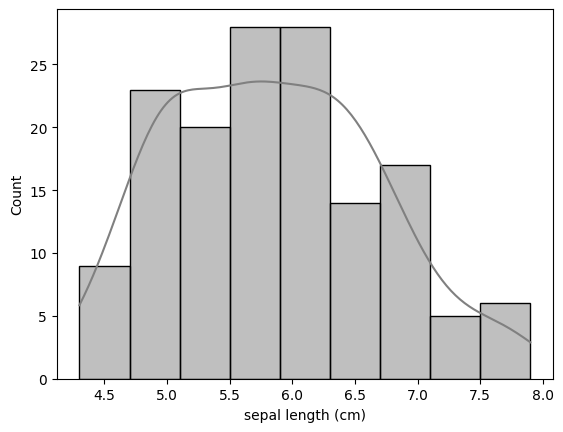

In [ ]:
sns.histplot(df['sepal length (cm)'], kde=True, color='grey')


<Axes: xlabel='sepal width (cm)', ylabel='Count'>

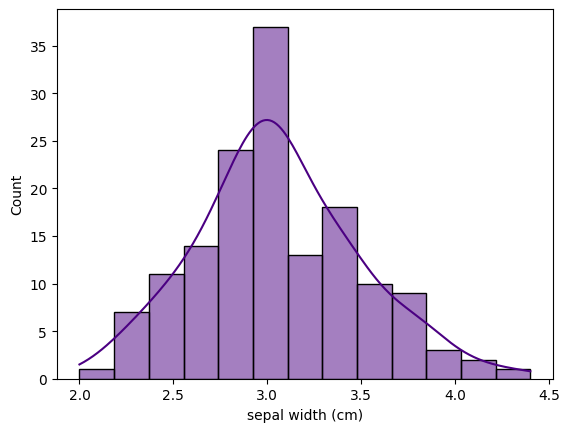

In [59]:
sns.histplot(df['sepal width (cm)'], kde=True,color="indigo")

<Axes: xlabel='petal length (cm)', ylabel='Count'>

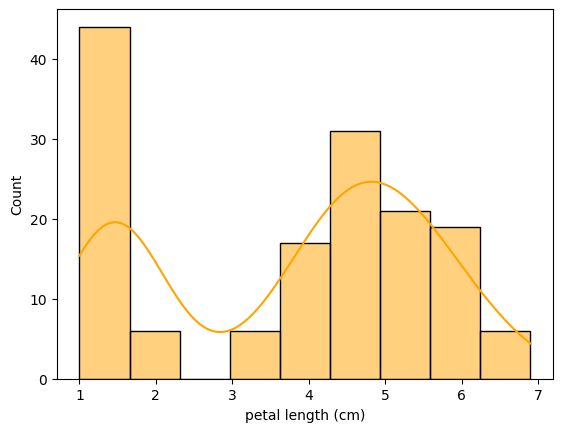

In [60]:
sns.histplot(df['petal length (cm)'], kde=True,color="orange")

<Axes: xlabel='petal width (cm)', ylabel='Count'>

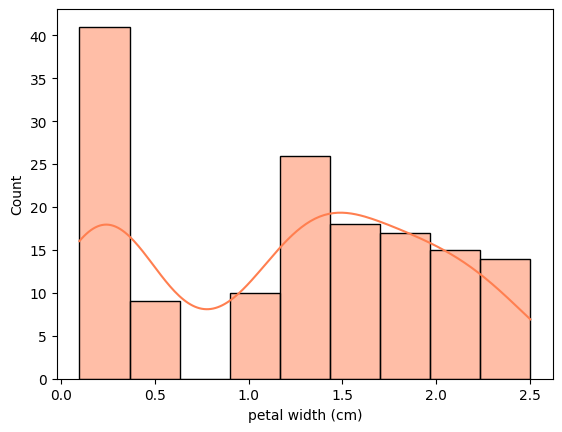

In [61]:
sns.histplot(df['petal width (cm)'], kde=True,color="coral")

<Axes: xlabel='species', ylabel='petal width (cm)'>

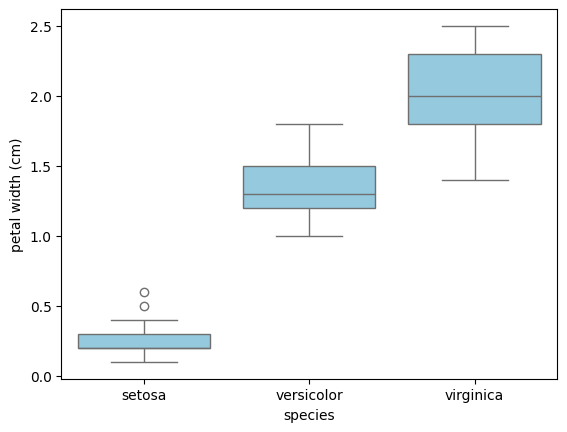

In [ ]:
sns.boxplot(x='species', y='petal width (cm)', data=df, color='skyblue')

<Axes: xlabel='species', ylabel='sepal width (cm)'>

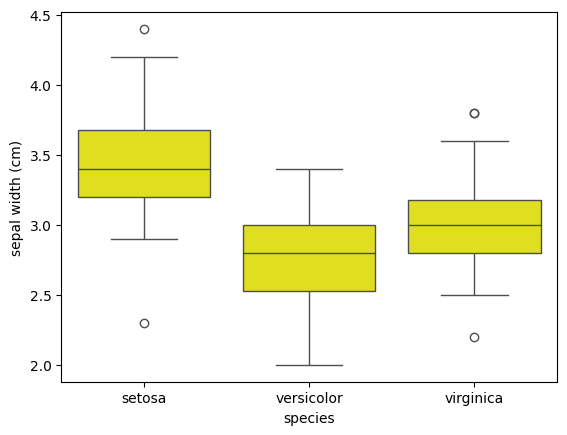

In [63]:
sns.boxplot(x='species', y='sepal width (cm)', data=df,color="yellow")

<Axes: xlabel='species', ylabel='sepal length (cm)'>

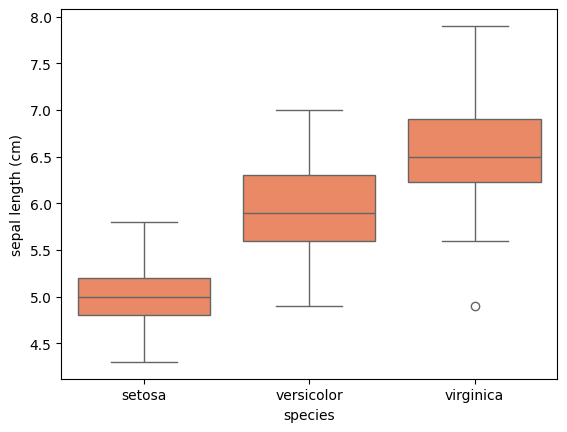

In [64]:
sns.boxplot(x='species', y='sepal length (cm)', data=df,color="coral")

<Axes: xlabel='species', ylabel='petal length (cm)'>

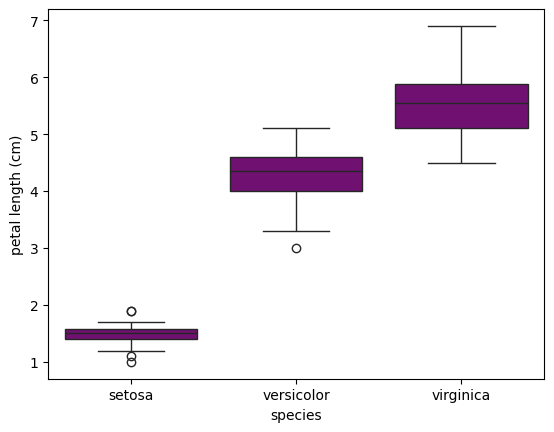

In [67]:
sns.boxplot(x='species', y='petal length (cm)', data=df,color="purple")

<Axes: xlabel='species', ylabel='sepal width (cm)'>

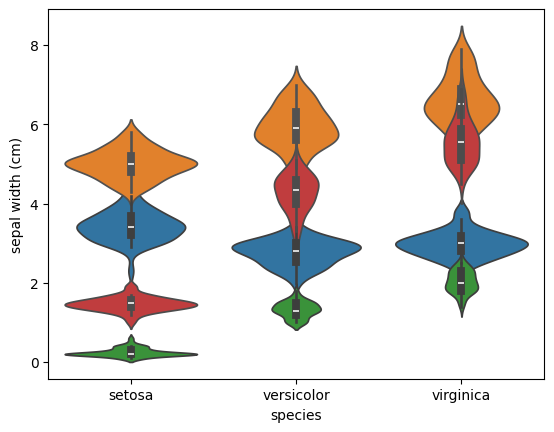

In [71]:
sns.violinplot(x='species', y='sepal width (cm)', data=df)
sns.violinplot(x='species', y='sepal length (cm)', data=df)
sns.violinplot(x='species', y='petal width (cm)', data=df)
sns.violinplot(x='species', y='petal length (cm)', data=df)


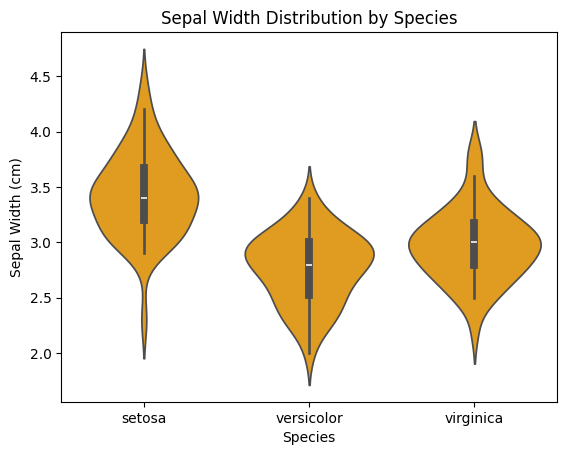

In [130]:
# Violin plot of Sepal Width by Species
sns.violinplot(x='species', y='sepal_width', data=df, color='orange')

plt.title("Sepal Width Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width (cm)")
plt.show()


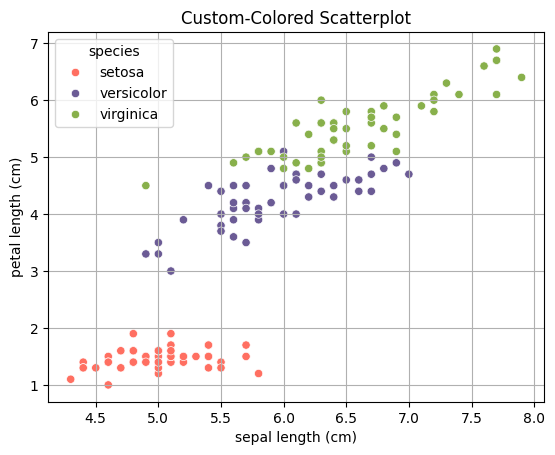

In [ ]:
custom_palette = {
    'setosa': '#FF6F61',        # coral
    'versicolor': '#6B5B95',    # indigo
    'virginica': '#88B04B'      # green
}

sns.scatterplot(
    x='sepal length (cm)',
    y='petal length (cm)',
    hue='species',
    palette=custom_palette,
    data=df
)

plt.title("Custom-Colored Scatterplot")
plt.grid(True)
plt.show()


<Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>

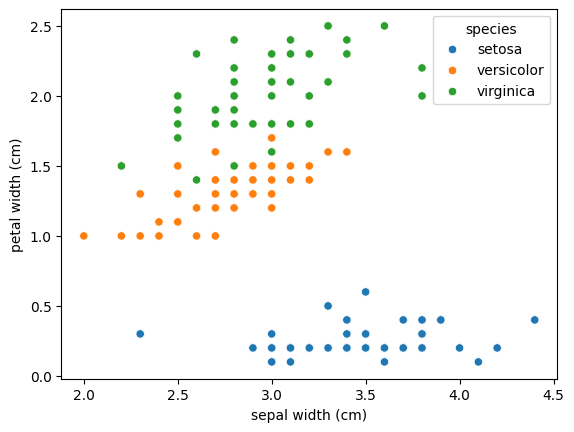

In [72]:
sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', hue='species', data=df)

<Axes: ylabel='sepal length (cm)'>

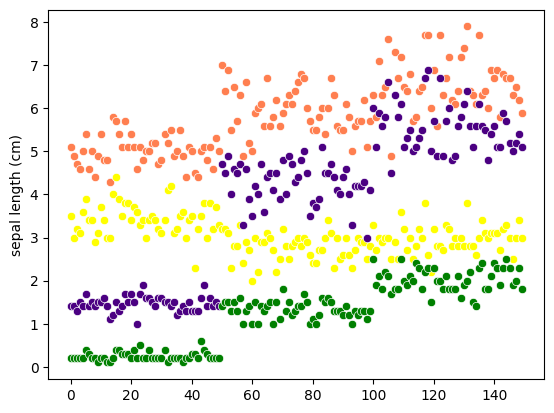

In [57]:
sns.scatterplot(df["sepal length (cm)"],color="coral")
sns.scatterplot(df["sepal width (cm)"],color="yellow")
sns.scatterplot(df["petal length (cm)"],color="indigo")
sns.scatterplot(df["petal width (cm)"],color="green")

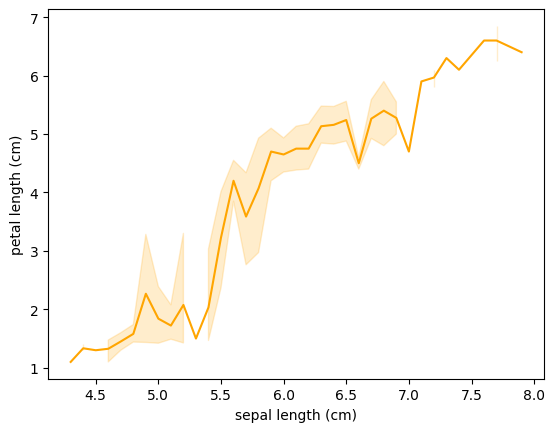

In [ ]:
df_sorted = df.sort_values('sepal length (cm)')

sns.lineplot(x='sepal length (cm)', y='petal length (cm)', data=df_sorted, color='orange')

plt.show()


<Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>

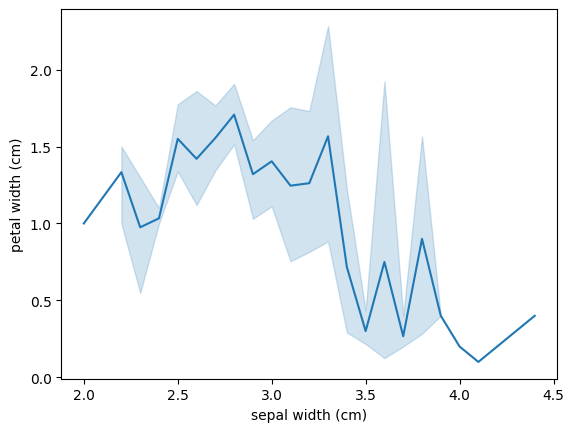

In [76]:
df_width = df[['sepal width (cm)', 'petal width (cm)']] # Define df_width first
sns.lineplot(x='sepal width (cm)', y='petal width (cm)', data=df_width) #Then use it in the sns.lineplot function

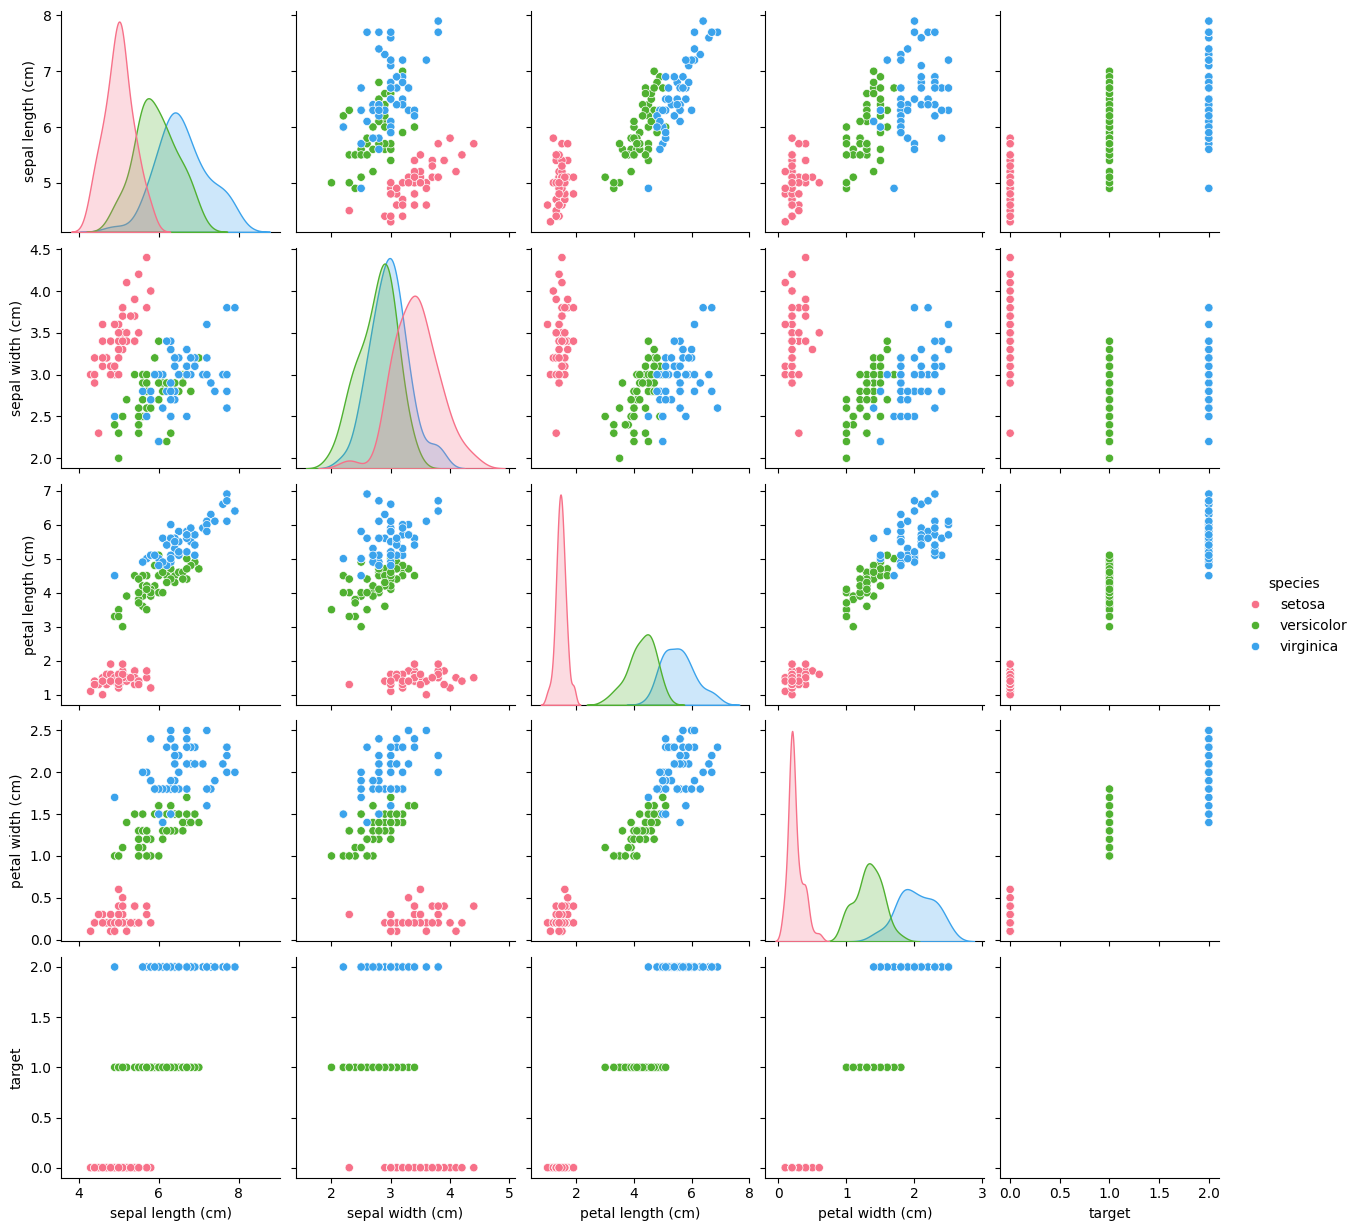

In [ ]:
sns.pairplot(df, hue='species', palette='husl')


<Axes: >

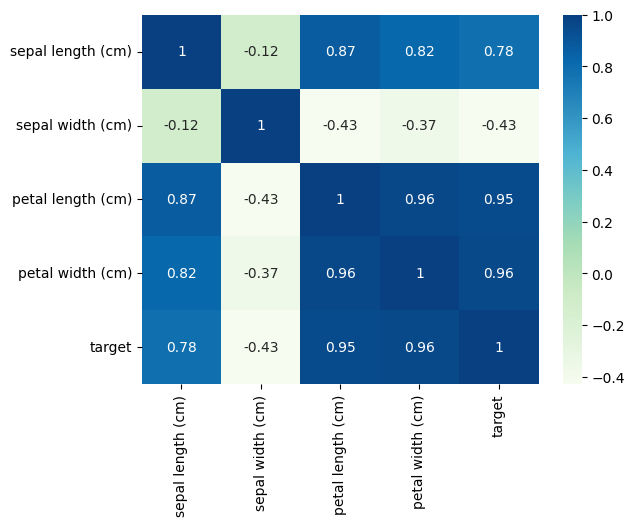

In [ ]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='GnBu')

<Axes: >

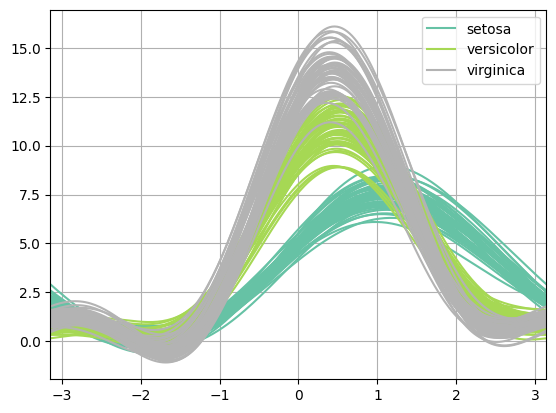

In [ ]:
from pandas.plotting import andrews_curves

andrews_curves(df, 'species', colormap='Set2')


<Axes: xlabel='sepal width (cm)', ylabel='Density'>

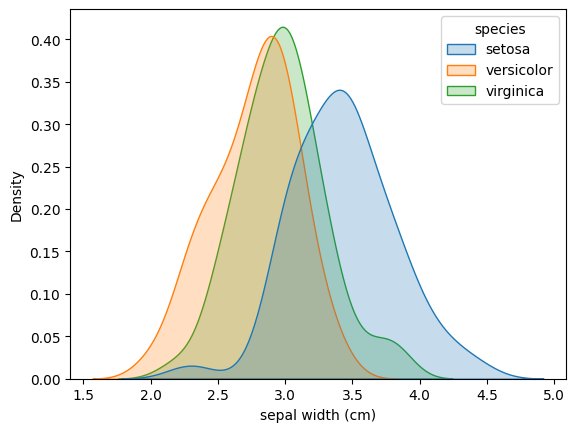

In [ ]:
sns.kdeplot(data=df, x='sepal width (cm)', hue='species', fill=True)

<Axes: xlabel='sepal length (cm)', ylabel='Density'>

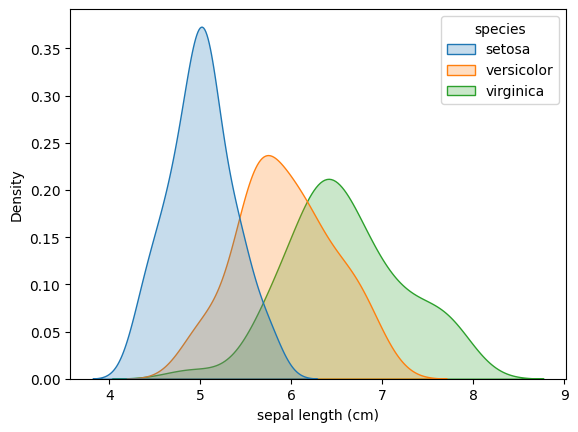

In [77]:
sns.kdeplot(data=df, x='sepal length (cm)', hue='species', fill=True)

<Axes: xlabel='petal width (cm)', ylabel='Density'>

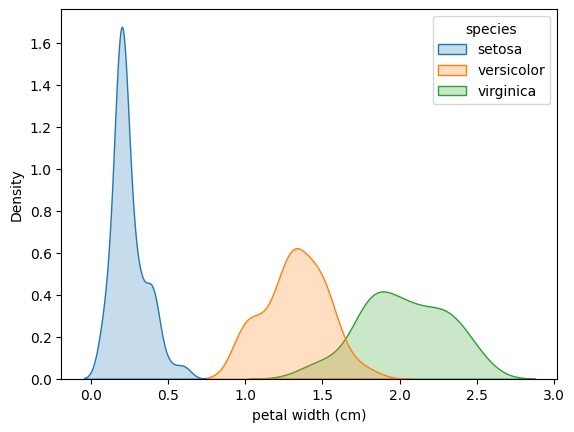

In [78]:
sns.kdeplot(data=df, x='petal width (cm)', hue='species', fill=True)

<Axes: xlabel='petal length (cm)', ylabel='Density'>

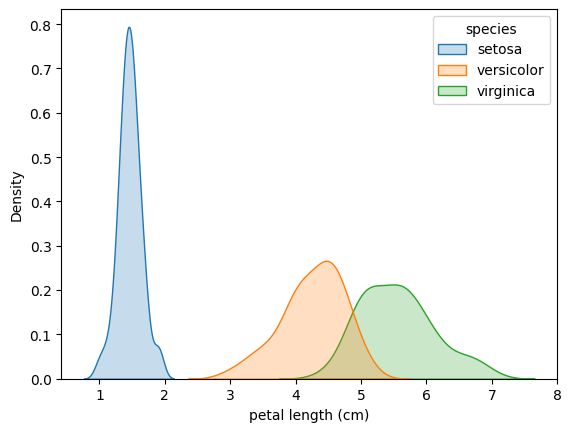

In [79]:
sns.kdeplot(data=df, x='petal length (cm)', hue='species', fill=True)

<Axes: >

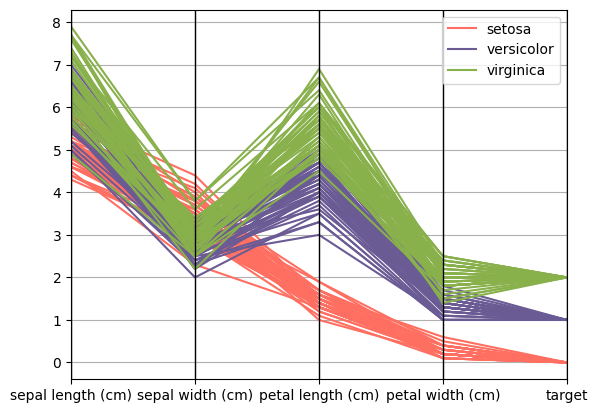

In [ ]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, 'species', color=['#FF6F61', '#6B5B95', '#88B04B'])


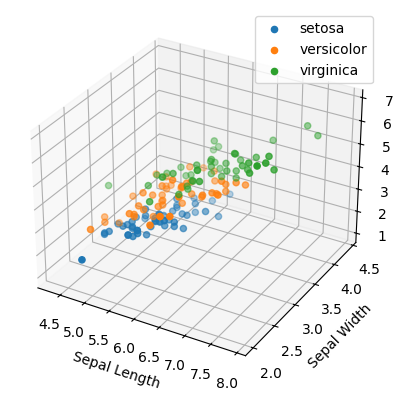

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for s in df['species'].unique():
    subset = df[df['species'] == s]
    ax.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], subset['petal length (cm)'], label=s)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()